In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def prepare_resuls_for_plot(df):
    df.drop("Support", axis=1, inplace=True)
    df["Specificity"] = df.iloc[1::2]["Recall"]
    df["Specificity"] = df["Specificity"].shift(-1)
    return df.iloc[0::2]

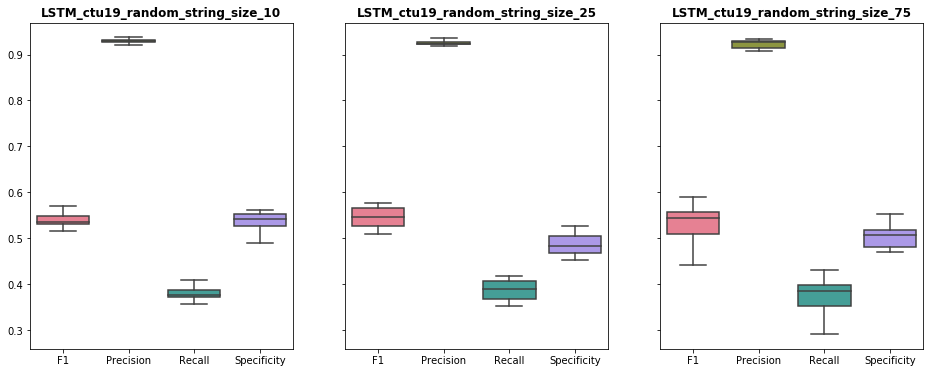

In [4]:
sizes_string = [10, 25 ,75]

#For plotting all results together
fig, axes = plt.subplots(1, len(sizes_string), figsize=(16,6), sharey=True)

for k, str_size in enumerate(sizes_string):    
    name = "../Datasets/change_of_context/results_LSTM_random_pos_size_"+str(str_size)+".csv"
    
    #Make single plot of results
    df = (pd.read_csv(name, header=None,
                   names=["F1", "Precision", "Recall", "Support"]).
          pipe(prepare_resuls_for_plot))
    sns.boxplot(data=df.iloc[:,0:4], ax=axes[k], palette="husl", showfliers = False)
    axes[k].set_title('LSTM_ctu19_random_string_size_'+str(str_size),fontweight="bold")

#Show all the runs    
plt.show()

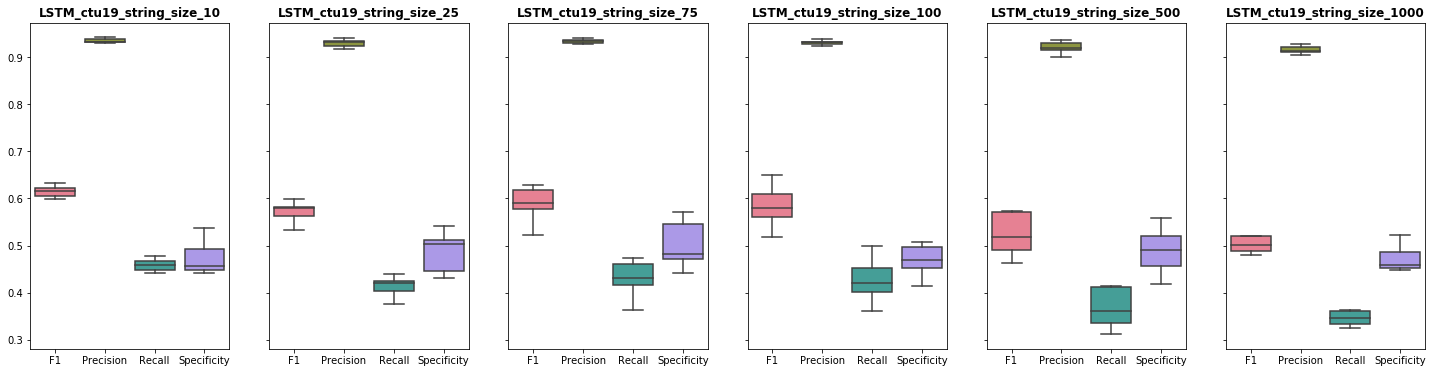

In [6]:
sizes_string = [10, 25 ,75, 100, 500, 1000]

#For plotting all results together
fig, axes = plt.subplots(1, len(sizes_string), figsize=(25,6), sharey=True)

for k, str_size in enumerate(sizes_string):    
    name = "../Datasets/change_of_context/results_LSTM_size_"+str(str_size)+".csv"
    
    #Make single plot of results
    df = (pd.read_csv(name, header=None,names=["F1", "Precision", "Recall", "Support"])
          .pipe(prepare_resuls_for_plot))
    sns.boxplot(data=df.iloc[:,0:4], ax=axes[k], palette="husl", showfliers = False)
    axes[k].set_title('LSTM_ctu19_string_size_'+str(str_size),fontweight="bold")

#Show all the runs    
plt.show()